In [22]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [23]:
weather_df = pd.read_csv('weatherHistory.csv')

In [24]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [25]:
#weather_df.unique()

In [26]:
weather_df['Precip Type'].isna().sum()

517

In [27]:
#weather_df.dropna()
weather_df = weather_df.dropna()

In [28]:
weather_df['Precip Type'].value_counts()
#95.936
#rain p = 0.89
# snow p = 
entropy = np.log(0.89) * np.log(0.11)

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [42]:
#Entropy
rain = 85224
snow = 10712
p_rain = 

In [29]:
summary_counts = weather_df['Summary'].value_counts()
summary_counts 

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

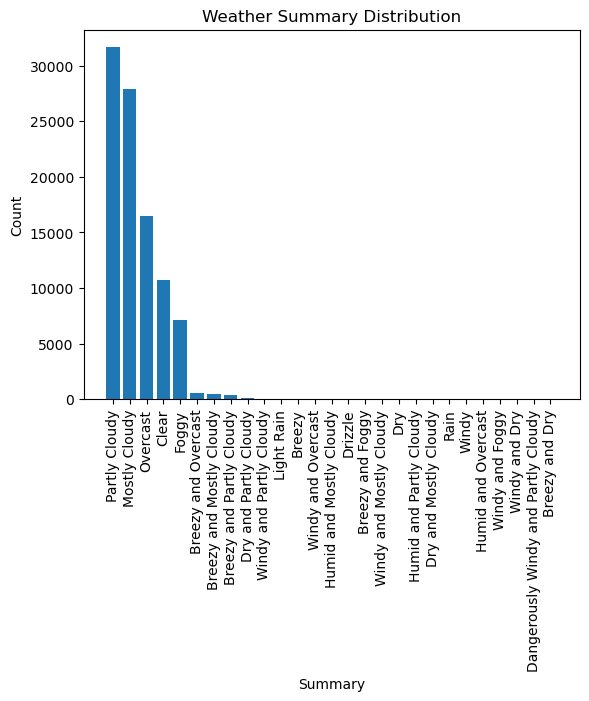

In [30]:
# Create a bar chart
plt.bar(summary_counts.index, summary_counts.values)
# Customize the chart
plt.xlabel('Summary')
plt.ylabel('Count')
plt.title('Weather Summary Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

## Predict Classification for the Precip Type feature 

### Decision Tree

In [43]:
X = weather_df[['Temperature (C)','Apparent Temperature (C)',
                      'Humidity','Wind Speed (km/h)','Visibility (km)','Loud Cover','Pressure (millibars)']]
y = weather_df['Precip Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [44]:
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,16.1000,0.0,1014.36
96449,24.583333,24.583333,0.48,10.0947,15.5526,0.0,1015.16
96450,22.038889,22.038889,0.56,8.9838,16.1000,0.0,1015.66
96451,21.522222,21.522222,0.60,10.5294,16.1000,0.0,1015.95


In [64]:
X = weather_df[['Humidity','Loud Cover','Pressure (millibars)']]
y = weather_df['Precip Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [65]:
#Train Decission Tree

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_tree.fit(X, y)
predictions = clf_tree.predict(X)
train_accuracy = clf_tree.score(X_train, y_train)
test_accuracy = clf_tree.score(X_test, y_test)

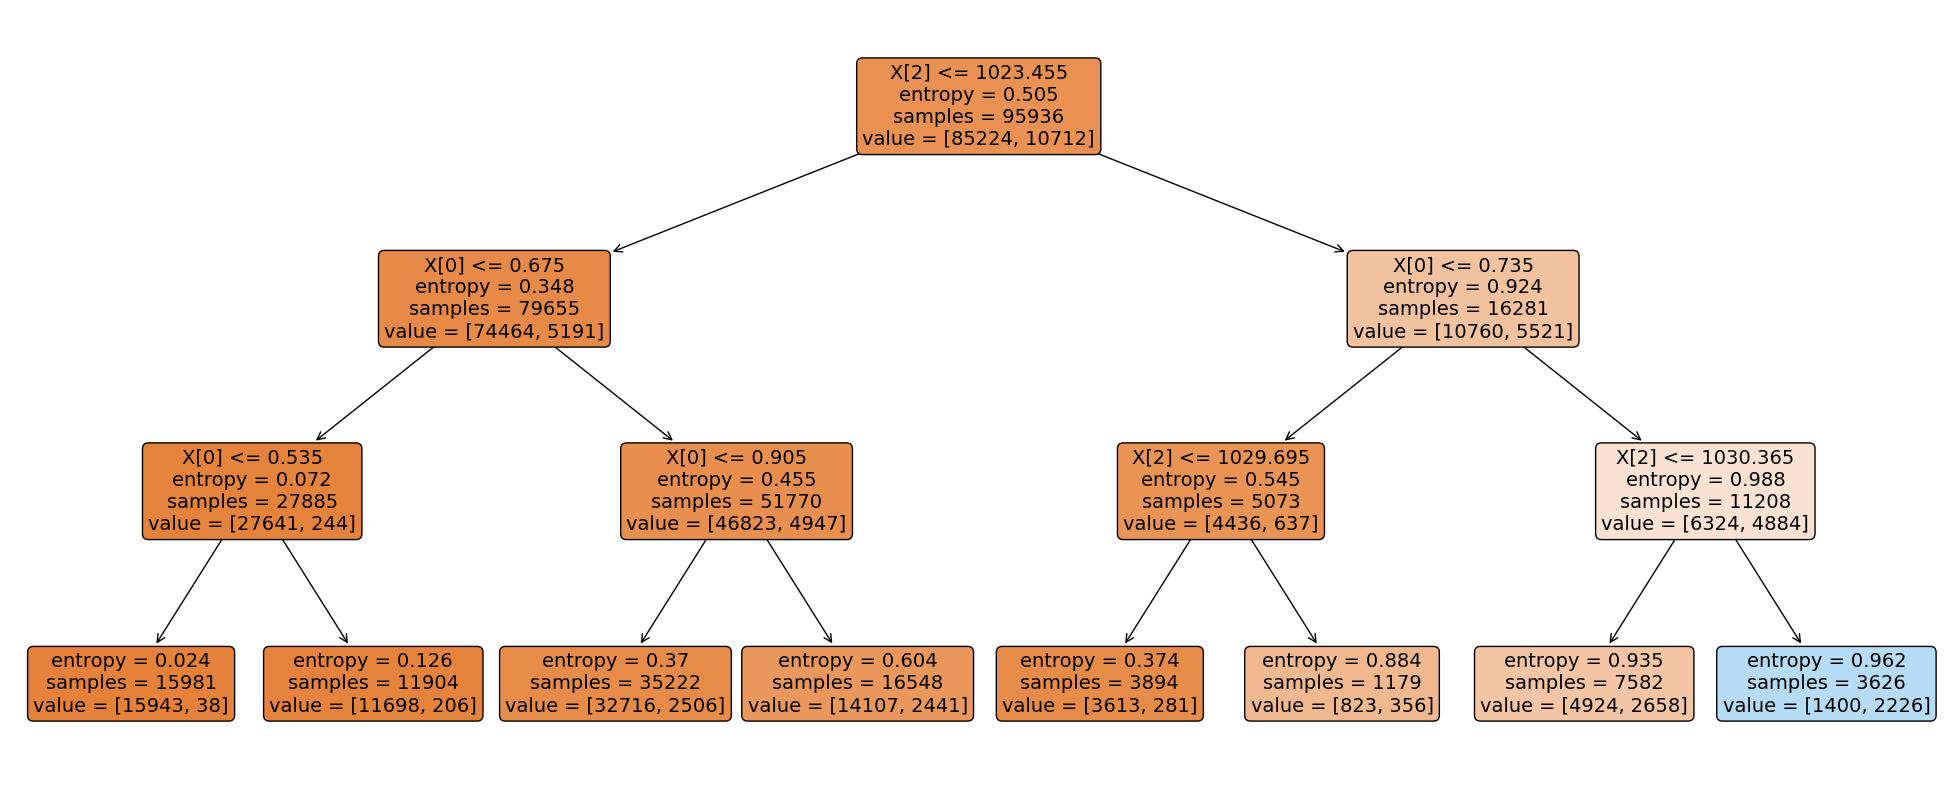

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))

plot_tree(
    clf_tree, 
    filled=True, 
    rounded=True, 
    fontsize=14);

In [67]:
print('The train accuraccy is:', train_accuracy)
print('The test accuraccy is:', test_accuracy)

The train accuraccy is: 0.8973784333142232
The test accuraccy is: 0.8963127035830619


In [39]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf_tree.fit(X_train, y_train)

# Predict class labels for the training and test data using Decision Tree
dt_train_preds = clf_tree.predict(X_train)
dt_test_preds = clf_tree.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

train_accuracy = clf_tree.score(X_train, y_train)
test_accuracy = clf_tree.score(X_test, y_test)

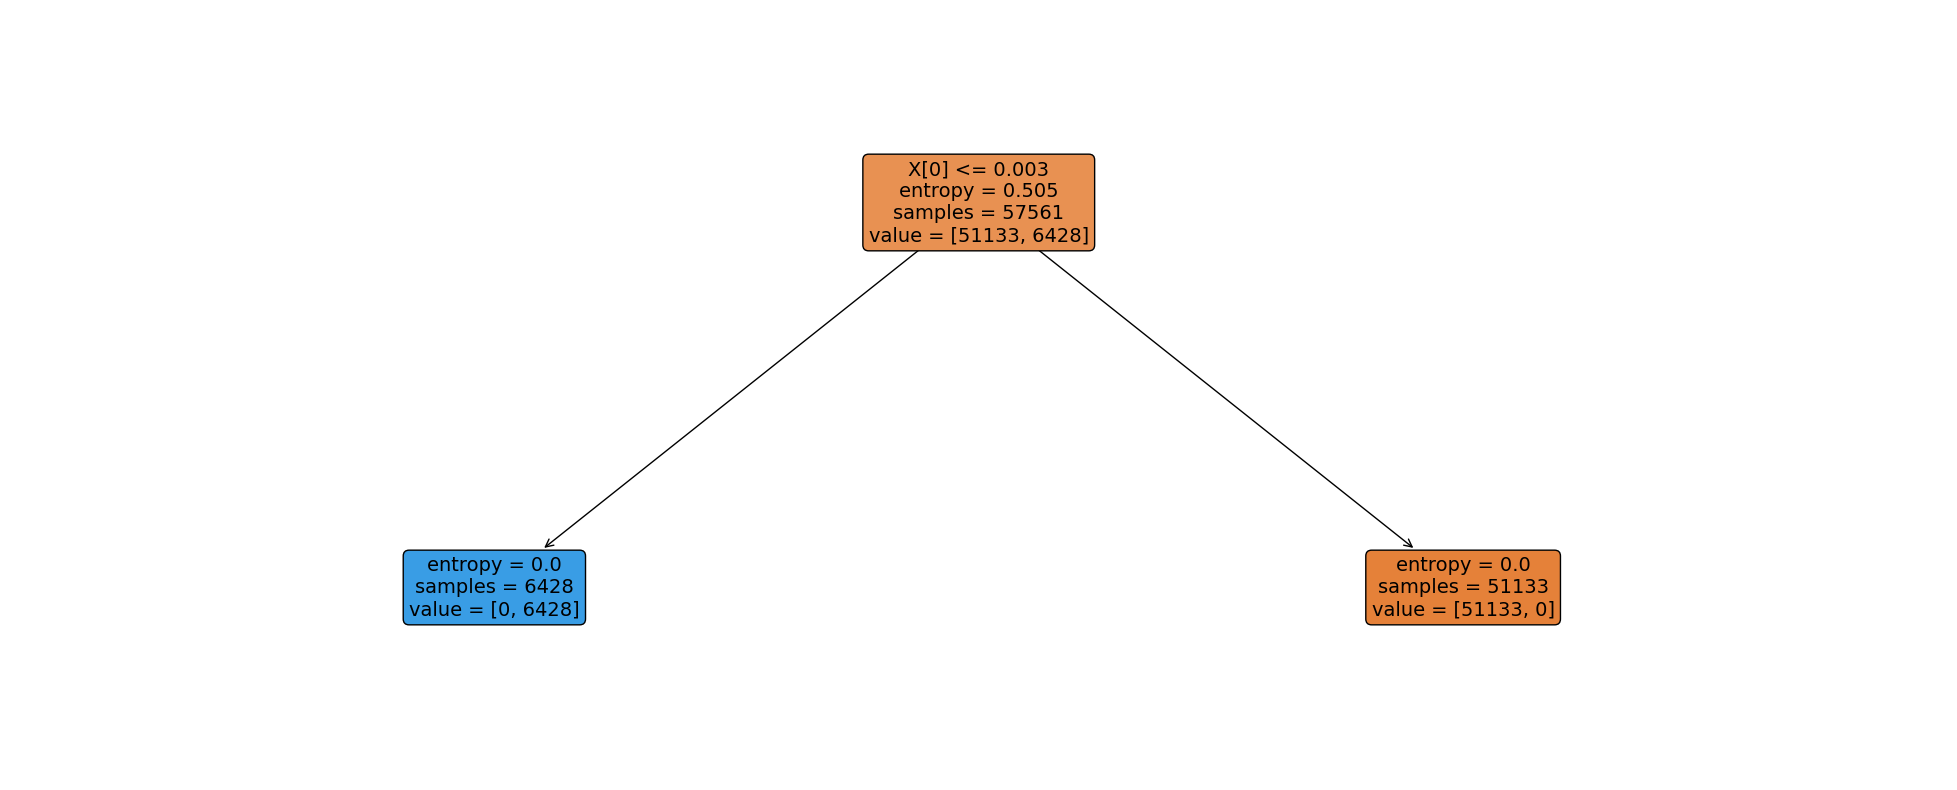

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))

plot_tree(
    clf_tree, 
    filled=True, 
    rounded=True, 
    fontsize=14);

The train accuraccy is: 1.0
The test accuraccy is: 1.0



### Conclusion
- For this easy distinction between the two Precip Type of our data set the accuraccy is pretty awesome. But as we have just two different values ['rain', 'snow'] is it not too difficult to do that. 
- This is also the reason why we do not try out more models like random forrest or linear classification

--> Therefore we are trying to do it on a more difficult label the Summary. Maybe there we can create a more complex model to even get a more precise answer of the weather of a day.
***

## Predict Classification for the summary 

In [10]:
X = weather_df[['Temperature (C)','Apparent Temperature (C)',
                      'Humidity','Wind Speed (km/h)','Visibility (km)','Loud Cover','Pressure (millibars)']]
y = weather_df['Summary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [16]:
#Train Decission Tree

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_tree.fit(X_train, y_train)

# Predict class labels for the training and test data using Decision Tree
dt_train_preds = clf_tree.predict(X_train)
dt_test_preds = clf_tree.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

train_accuracy = clf_tree.score(X_train, y_train)
test_accuracy = clf_tree.score(X_test, y_test)

In [17]:
print(train_accuracy)
print(test_accuracy)

0.49455360400271015
0.49206514657980455


## Try to get the optimal number of the max_depth

In [18]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=13)
clf_tree.fit(X_train, y_train)

# Predict class labels for the training and test data using Decision Tree
dt_train_preds = clf_tree.predict(X_train)
dt_test_preds = clf_tree.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

train_accuracy = clf_tree.score(X_train, y_train)
test_accuracy = clf_tree.score(X_test, y_test)
    
print(train_accuracy)
print(test_accuracy)

0.5912683935303418
0.5227361563517915


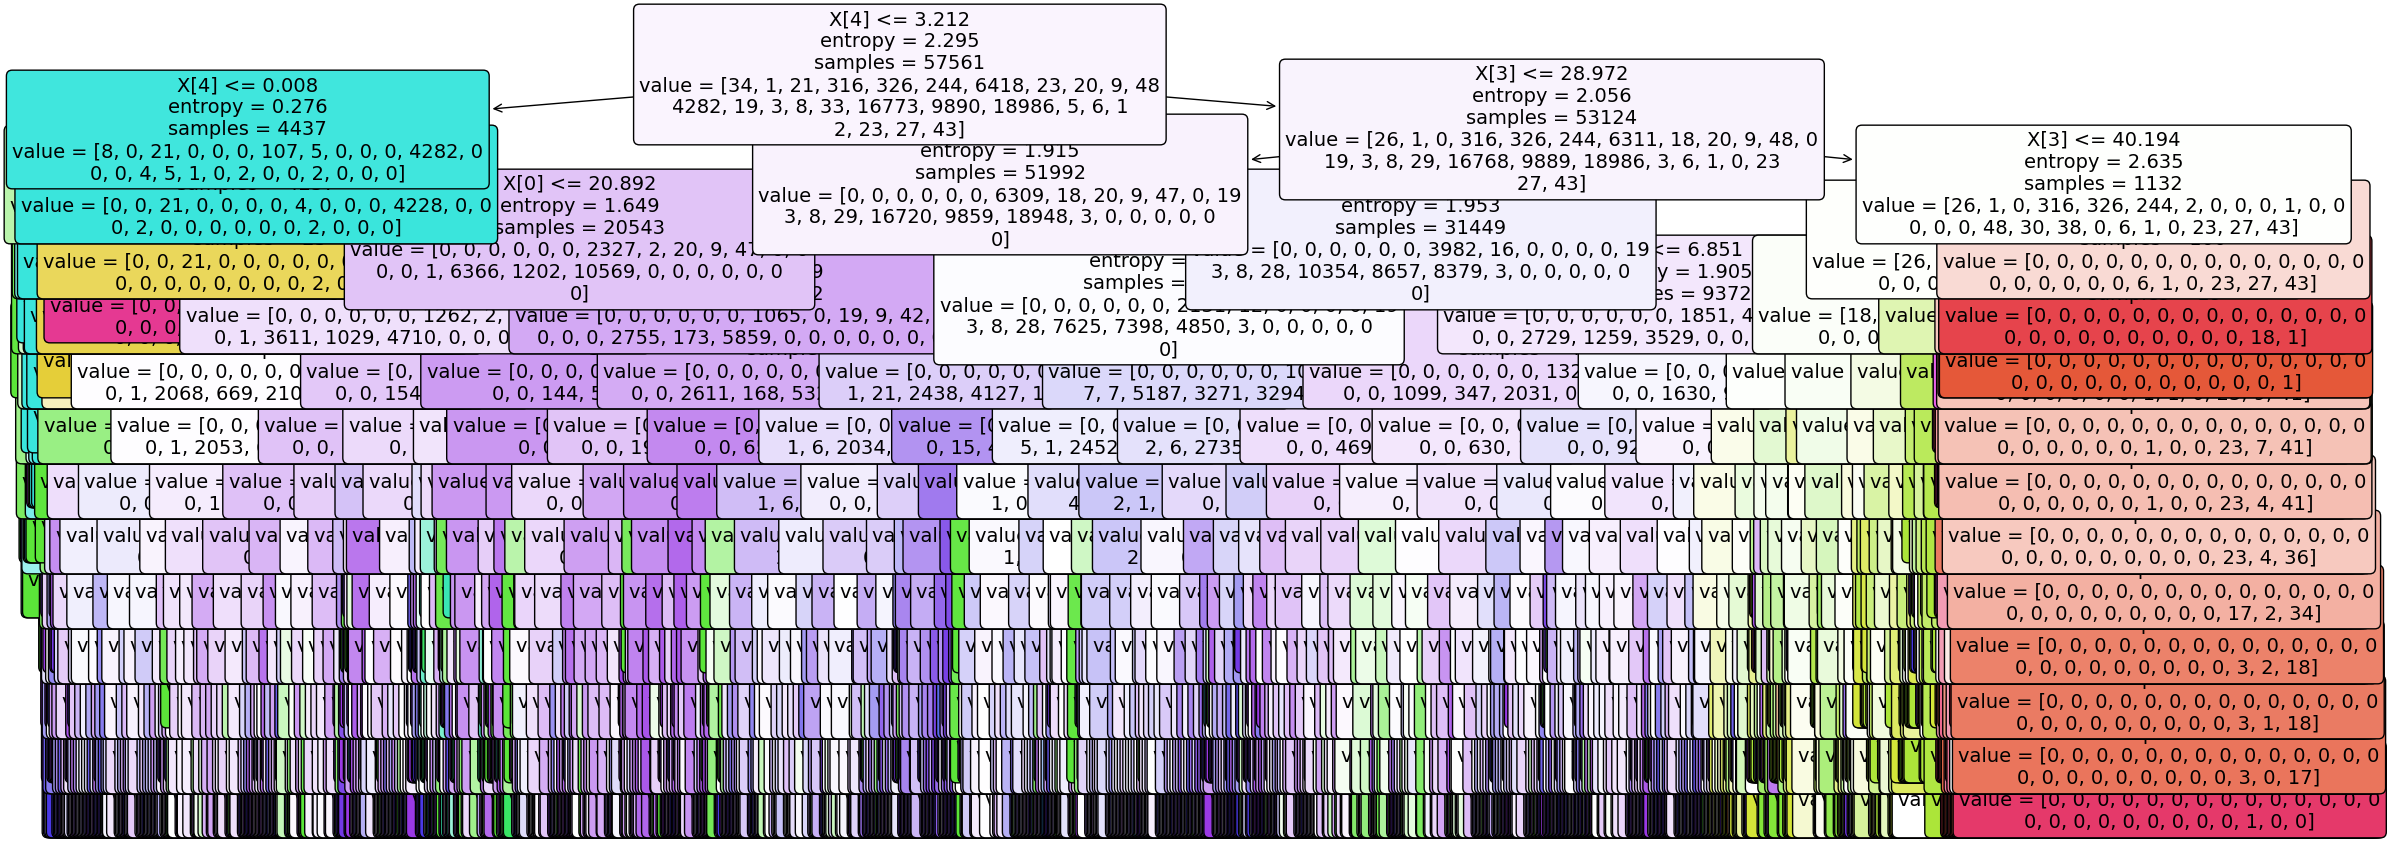

In [ ]:
plt.figure(figsize=(25,10))

plot_tree(
    clf_tree, 
    filled=True, 
    rounded=True, 
    fontsize=14);

- We find the optimal tree depth with 13

## Random Forrest

In [20]:
clf = RandomForestClassifier()
### WRITE YOUR CODE HERE ###
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999131356300273
Test Accuracy: 0.5561433224755701


## Alright we see immediatly that the accurracy of a random forrest is quit better than our simple ramdom forrest for a specific depth. Let's try to adjust the model parameter a bit, so that the model becomes even stronger.

In [21]:
clf_tree = RandomForestClassifier() #max_depth=13
clf_tree.fit(X_train, y_train)

# Predict class labels for the training and test data using Decision Tree
dt_train_preds = clf_tree.predict(X_train)
dt_test_preds = clf_tree.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

train_accuracy = clf_tree.score(X_train, y_train)
test_accuracy = clf_tree.score(X_test, y_test)

print(train_accuracy)
print(test_accuracy)

0.9999131356300273
0.5576286644951141


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

logreg_train_preds = reg.predict(X_train)
logreg_test_preds = reg.predict(X_test)

logreg_train_accuracy = accuracy_score(y_train, logreg_train_preds)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_preds)

print(logreg_train_accuracy)
print(logreg_test_accuracy)

0.3923489862928024
0.39661237785016284


/Users/linuszarse/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine

In [23]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [24]:
train_accuracy = svc.score(X_train, y_train)
test_accuracy = svc.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.3978040687270895
0.39846254071661236


In [ ]:
# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Determine the range for each principal component
feature1_min, feature1_max = np.min(X_train_pca[:, 0]) - 1, np.max(X_train_pca[:, 0]) + 1
feature2_min, feature2_max = np.min(X_train_pca[:, 1]) - 1, np.max(X_train_pca[:, 1]) + 1

# Create a meshgrid of points covering the range of both principal components
step = 0.1  # The step size for the meshgrid
x_values = np.arange(feature1_min, feature1_max, step)
y_values = np.arange(feature2_min, feature2_max, step)
xx, yy = np.meshgrid(x_values, y_values)

# Transform the meshgrid points back to the original feature space using inverse_transform
grid_points = np.c_[xx.flatten(), yy.flatten()]
reconstructed_points = pca.inverse_transform(grid_points)

# Use the trained classifier to predict the class labels for the reconstructed points
Z = svc.predict(reconstructed_points)

# Reshape the predicted labels to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training samples
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k')

# Set labels and show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries (SVM)')
plt.show()


## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.6436476086238947
0.4733029315960912


## Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


train_accuracy = gnb.score(X_train, y_train)
test_accuracy = gnb.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.4365108319869356
0.43908794788273614


In [12]:
# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Determine the range for each principal component
feature1_min, feature1_max = np.min(X_train_pca[:, 0]) - 1, np.max(X_train_pca[:, 0]) + 1
feature2_min, feature2_max = np.min(X_train_pca[:, 1]) - 1, np.max(X_train_pca[:, 1]) + 1

In [ ]:
# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training samples
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k')

# Set labels and show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries (PCA)')
plt.show()

***

## Parameter Estimation

- Now i try to get the best Parameter for the best model with the default values by applying the different parameter estimation models
    - Grid Search
    - Random Search 

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GaussianNB()

grid_vals = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5], 
             'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]}
grid_nb = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

# Training and Prediction
grid_nb.fit(X_train, y_train)
preds = grid_nb.best_estimator_.predict(X_test)
print("Best parameter: ", grid_nb.best_params_)



In [ ]:
#Naive Bayes Parameters
gnb.get_params().keys()

In [ ]:
#Random Forest Parameters
clf_tree.get_params().keys()

In [ ]:
model = RandomForestClassifier()

grid_vals = {
    'bootstrap': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20],
    'max_samples': [None, 0.5, 0.7],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    #'n_jobs': [-1],
    #'oob_score': [False, True],
    'random_state': [42]
    #'verbose': [0, 1, 2],
    #'warm_start': [False, True]
}

grid_rf = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

# Training and Prediction
grid_rf.fit(X_train, y_train)
preds = grid_rf.best_estimator_.predict(X_test)
print("Best parameter: ", grid_rf.best_params_)

In [ ]:
accuracy = accuracy_score(y_test, preds)
print("Accuracy of the best model: ", accuracy)

***

## Random Search 

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400],
              'learning_rate': [0.001, 0.01, 0.1, 1, 10]]}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(X_train, y_train)
preds = random_rf.best_estimator_.predict(X_test)

***

In [ ]:
max_depth_absolut = 50
test_accuraccy = []
train_accuraccy = []

for i in range(1,max_depth_absolut):
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf_tree.fit(X_train, y_train)

    # Predict class labels for the training and test data using Decision Tree
    dt_train_preds = clf_tree.predict(X_train)
    dt_test_preds = clf_tree.predict(X_test)

    dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
    dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

    train_accuracy = clf_tree.score(X_train, y_train)
    test_accuracy = clf_tree.score(X_test, y_test)
    
    train_accuraccy.append(train_accuracy)
    test_accuraccy.append(test_accuracy)

    

In [ ]:
# Plotting the accuracies
plt.plot(range(1, max_depth_absolut), train_accuraccy, label='Train Accuracy')
plt.plot(range(1, max_depth_absolut), test_accuraccy, label='Test Accuracy')

# Adding labels and title to the plot
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
optimal_depth = max(range(1, max_depth_absolut), key=lambda x: test_accuraccy[x-1])
best_test_accuracy = test_accuraccy[optimal_depth-1]

print("Optimal Depth:", optimal_depth)
print("Best Test Accuracy:", best_test_accuracy)

In [ ]:
max_depth_absolut = 50
rf_test_accuraccy = []
rf_train_accuraccy = []

for i in range(1,max_depth_absolut):
    clf_tree = RandomForestClassifier(max_depth=i)
    clf_tree.fit(X_train, y_train)

    # Predict class labels for the training and test data using Decision Tree
    dt_train_preds = clf_tree.predict(X_train)
    dt_test_preds = clf_tree.predict(X_test)

    dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
    dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

    train_accuracy = clf_tree.score(X_train, y_train)
    test_accuracy = clf_tree.score(X_test, y_test)
    
    rf_train_accuraccy.append(train_accuracy)
    rf_test_accuraccy.append(test_accuracy)

In [ ]:
# Plotting the accuracies
plt.plot(range(1, max_depth_absolut), rf_train_accuraccy, label='Train Accuracy')
plt.plot(range(1, max_depth_absolut), rf_test_accuraccy, label='Test Accuracy')

# Adding labels and title to the plot
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
optimal_depth = max(range(1, max_depth_absolut), key=lambda x: test_accuraccy[x-1])
best_test_accuracy = test_accuraccy[optimal_depth-1]

print("Optimal Depth:", optimal_depth)
print("Best Test Accuracy:", best_test_accuracy)